In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [202]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/loan_data_set.csv'
url

'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/loan_data_set.csv'

In [203]:
df=pd.read_csv(url)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# method 1-- quantile based flooring and capping 

In [4]:
arr=np.array([10,25,34,67,75,48,96,29])
arr

array([10, 25, 34, 67, 75, 48, 96, 29])

In [5]:
np.where(arr%5==0,300,arr)

array([300, 300,  34,  67, 300,  48,  96,  29])

In [6]:
df['LoanAmount'].quantile(0.20)

95.0

In [7]:
df['LoanAmount'].quantile(0.80)

182.0

In [8]:
df['LoanAmount'].quantile(0.90)

235.79999999999995

In [9]:
df['LoanAmount'].quantile(0.10)

71.0

<Axes: >

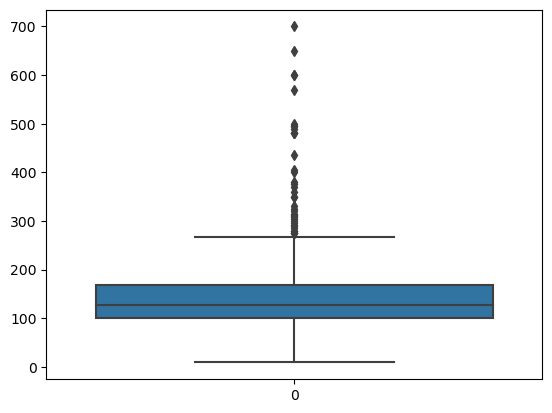

In [10]:
sns.boxplot(df['LoanAmount'])

In [11]:
df['LoanAmount']=np.where(df['LoanAmount'] > 235,235,df['LoanAmount']) #num greater than 235 like 256 is taken as 235

In [12]:
df['LoanAmount']=np.where(df['LoanAmount'] < 71,71,df['LoanAmount'])

<Axes: >

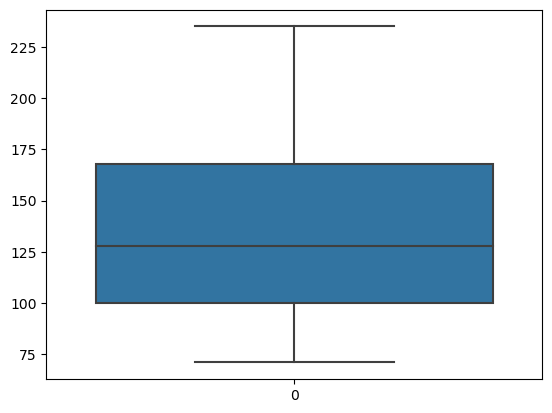

In [13]:
sns.boxplot(df['LoanAmount'])

In [14]:
df['LoanAmount']=np.where(df['LoanAmount'] > 182,182,df['LoanAmount'])

In [15]:
df['LoanAmount']=np.where(df['LoanAmount'] < 95,95,df['LoanAmount'])

<Axes: >

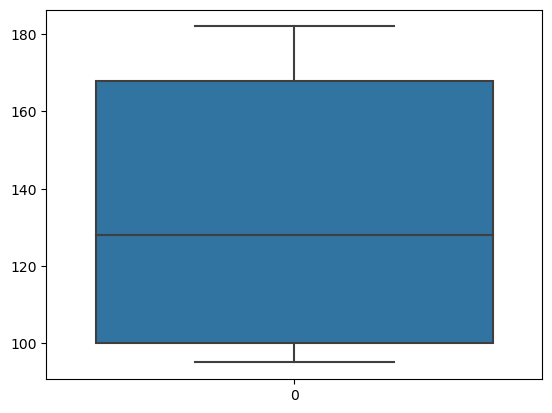

In [16]:
sns.boxplot(df['LoanAmount'])

# method 2 -- outlier trim

<Axes: >

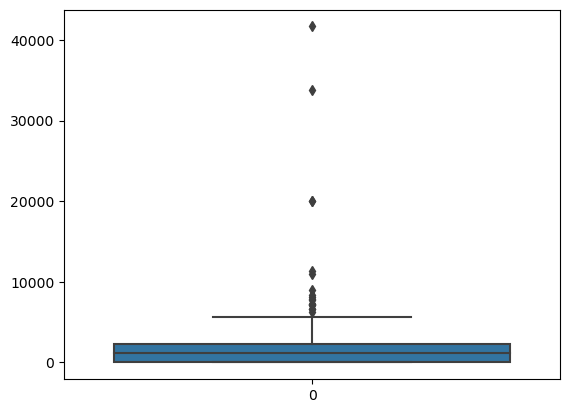

In [19]:
sns.boxplot(df['CoapplicantIncome'])

# step 1- calculate 80 nd 20 percentile values

In [20]:
df['CoapplicantIncome'].quantile(0.20)

0.0

In [21]:
df['CoapplicantIncome'].quantile(0.80)

2535.0000000000005

## step 2 - fine the index in the data where the values are greater then 2535 nd lesss than 0

In [23]:
x=df[(df['CoapplicantIncome'] < 0)|(df['CoapplicantIncome']> 2535)].index

In [24]:
x

Index([  5,   9,  12,  13,  19,  21,  24,  30,  34,  38,
       ...
       577, 579, 581, 585, 590, 593, 600, 601, 603, 605],
      dtype='int64', length=123)

## step 3-- drop the values present in the indexs obtianed from step 2

In [28]:
df['CoapplicantIncome']=df['CoapplicantIncome'].drop(x)

<Axes: >

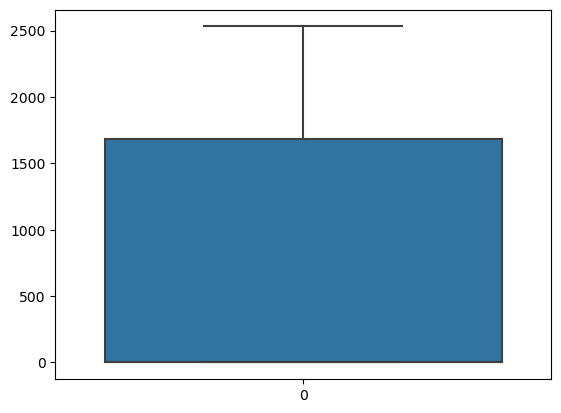

In [27]:
sns.boxplot(df['CoapplicantIncome'])

## 4 method --log  of transformation method 

<Axes: >

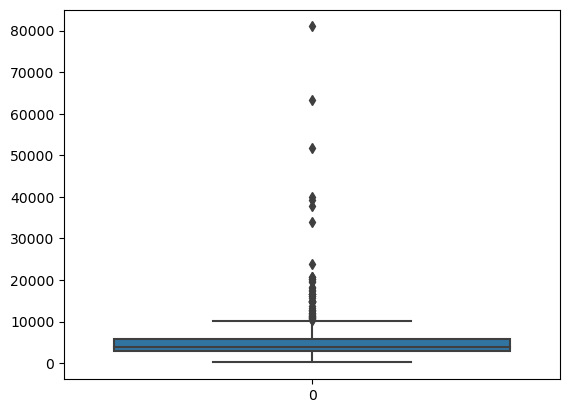

In [29]:
sns.boxplot(df['ApplicantIncome'])

In [31]:
np.log(10)

2.302585092994046

In [32]:
np.log(100)

4.605170185988092

In [33]:
np.log(1000)

6.907755278982137

In [34]:
np.log(10000)

9.210340371976184

In [35]:
np.log(50000)

10.819778284410283

In [37]:
df['ApplicantIncome_log']=np.log(df['ApplicantIncome'])

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,95.0,360.0,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699515


<Axes: >

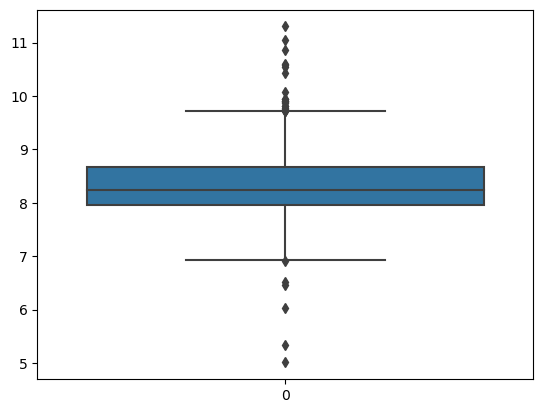

In [39]:
sns.boxplot(df['ApplicantIncome_log'])   #log method is not suitable for applicationincome column 
                                         # as it does not clearing the outliers 

## new data 

In [183]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

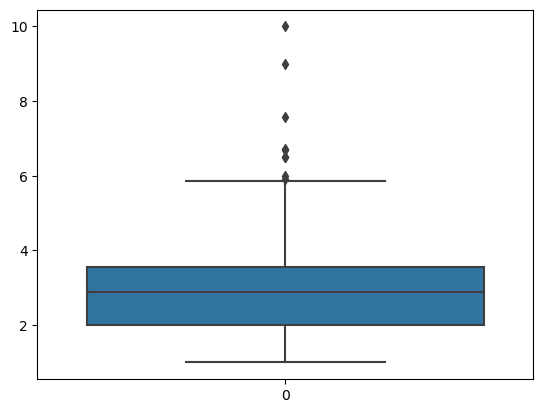

In [184]:
sns.boxplot(tips['tip'])

## method 5 -- repalce the outlier with the meadian of the colunm 

### calcuate 80 percentile of data ,20 percential of data and 50 percential of data

In [185]:
tips['tip'].quantile(0.75)   

3.5625

In [186]:
tips['tip'].quantile(0.25)  

2.0

In [180]:
tips['tip'].quantile(0.50)  

2.9

In [181]:
tips['tip'].median()

2.9

In [187]:
tips['tip']=np.where(tips['tip'] > 3.5,2.9,tips['tip'])

In [188]:
tips['tip']=np.where(tips['tip'] < 2,2.9,tips['tip'])

<Axes: >

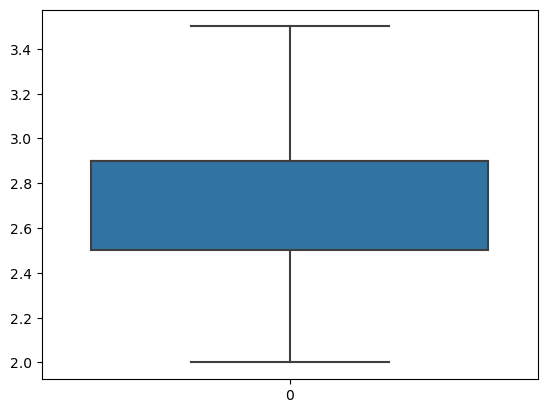

In [189]:
sns.boxplot(tips['tip'])

In [164]:
tips['tip'].quantile(0.85)  

3.3719999999999994

In [165]:
tips['tip'].quantile(0.15)  

2.03

In [166]:
tips['tip']=np.where(tips['tip'] > 4.1,2.9,tips['tip'])

In [167]:
tips['tip']=np.where(tips['tip'] < 1.7,2.9,tips['tip'])

<Axes: >

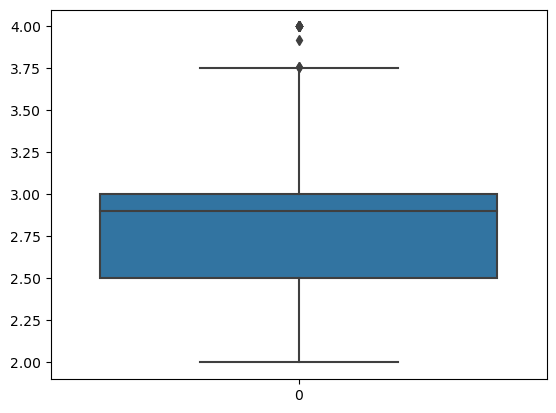

In [168]:
sns.boxplot(tips['tip'])

# method 6-- IQR

In [209]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [219]:
q1=df['ApplicantIncome'].quantile(0.25)
q1

2877.5

In [218]:
q2=df['ApplicantIncome'].quantile(0.75)
q2

5795.0

In [222]:
iqr=q2-q1
iqr

2917.5

In [223]:
## step 2 
#find the upper whisker and lower whiskerof the data

In [225]:
lw=q1-1.5*iqr
lw

-1498.75

In [230]:
uw=q2+1.5*iqr
uw

10171.25

In [240]:
df['ApplicantIncome']=np.where(df['ApplicantIncome'] > 10171,5795,df['ApplicantIncome']) ## replace by q3

In [243]:
df['ApplicantIncome']=np.where(df['ApplicantIncome'] < -1498,2877,df['ApplicantIncome']) ## replace by q1

<Axes: >

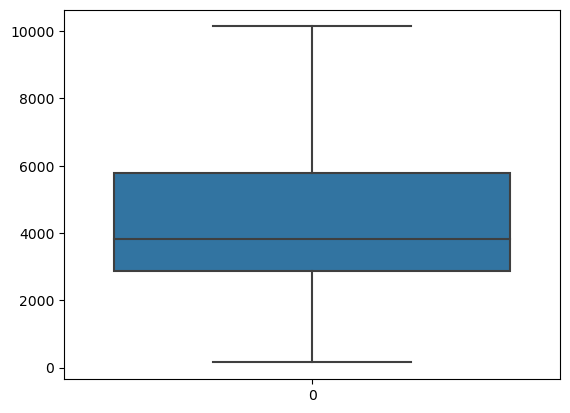

In [244]:
sns.boxplot(df['ApplicantIncome'])